In [1]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

###load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

###reshape

In [5]:
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
y_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
len(y_classes)

10

###observe dataset

In [8]:
def showImage(x,y,index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

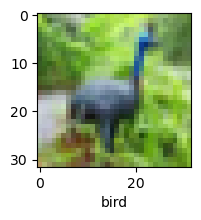

In [9]:
showImage(X_train, y_train, 6)

###normalize dataset

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

###build model

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

###compile model

In [14]:
model.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

###train model

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 105s 66ms/step - loss: 1.5015 - accuracy: 0.4546 - val_loss: 1.2337 - val_accuracy: 0.5564
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1331 - accuracy: 0.6037 - val_loss: 1.0681 - val_accuracy: 0.6231
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.0017 - accuracy: 0.6523 - val_loss: 1.0204 - val_accuracy: 0.6461
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9175 - accuracy: 0.6821 - val_loss: 0.9907 - val_accuracy: 0.6627
Epoch 5/5
1563/1563 [==============================] - 96s 62ms/step - loss: 0.8597 - accuracy: 0.7026 - val_loss: 0.9670 - val_accuracy: 0.6710


###make predictions

In [16]:
y_predictions = model.predict(X_test)

313/313 [==============================] - 7s 21ms/step


In [17]:
y_predictions[9]

array([2.0223148e-03, 9.3716949e-01, 5.6429900e-04, 1.8336946e-03,
       3.6833147e-04, 4.9582362e-04, 2.1826370e-02, 2.9515862e-04,
       1.2118283e-03, 3.4212720e-02], dtype=float32)

In [18]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [19]:
y_predictions

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 3,
 9,
 3,
 7,
 9,
 6,
 5,
 7,
 8,
 6,
 7,
 2,
 2,
 9,
 4,
 6,
 4,
 2,
 9,
 6,
 6,
 2,
 4,
 3,
 9,
 3,
 4,
 1,
 9,
 5,
 0,
 6,
 7,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 7,
 2,
 6,
 3,
 8,
 8,
 7,
 5,
 5,
 3,
 7,
 5,
 6,
 2,
 6,
 2,
 1,
 2,
 5,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 2,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 7,
 2,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 2,
 2,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 5,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 6,
 5,
 8,
 7,
 3,
 2,
 8,
 2,
 8,
 3,
 3,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 3,
 5,
 8,
 3,
 6,
 6,
 3,
 3,
 8,
 9,
 6,
 5,
 2,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 8,
 7,
 8,
 6,
 5,
 4,
 9,
 6,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 9,
 0,
 5,
 6,
 2,
 4,
 8,
 6,
 3,
 3,
 8,
 6,
 3,
 2,
 1,
 7,
 3,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 1,
 5,
 7,
 2,
 2,
 7,
 9,
 8,
 7,
 7,
 3,
 9,
 3,
 3,
 9,
 3,
 2,
 3,
 2,
 3,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 2,
 9,
 0,
 2,
 7,
 8,
 2,
 2,


In [20]:
y_tes = y_test.reshape(-1, )

In [21]:
y_predictions[5]

6

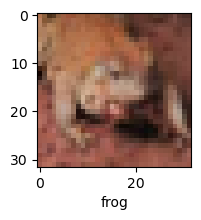

In [22]:
showImage(X_test, y_tes, 5)

### evaluate model

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.9670 - accuracy: 0.6710


[0.9670107364654541, 0.6710000038146973]

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, y_predictions))


              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1000
           1       0.85      0.76      0.80      1000
           2       0.51      0.60      0.55      1000
           3       0.47      0.49      0.48      1000
           4       0.66      0.58      0.61      1000
           5       0.54      0.62      0.58      1000
           6       0.71      0.78      0.74      1000
           7       0.67      0.79      0.73      1000
           8       0.80      0.79      0.80      1000
           9       0.82      0.69      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test, y_predictions)

In [28]:
cm

array([[602,  15, 141,  32,  22,  13,  12,  33, 103,  27],
       [ 12, 764,  22,  21,   5,  13,  20,  22,  26,  95],
       [ 30,   3, 599,  68,  79,  77,  76,  55,   8,   5],
       [  5,   1,  88, 495,  62, 217,  70,  53,   6,   3],
       [ 10,   1,  95,  81, 576,  55,  73,  95,  12,   2],
       [  2,   0,  68, 164,  43, 625,  28,  60,   6,   4],
       [  0,   2,  53,  87,  27,  41, 777,  10,   2,   1],
       [  4,   3,  41,  41,  41,  70,   7, 789,   2,   2],
       [ 38,  29,  41,  29,  10,  18,  12,  14, 792,  17],
       [ 23,  84,  18,  46,  10,  27,  26,  45,  30, 691]], dtype=int64)

In [29]:
import seaborn as sns

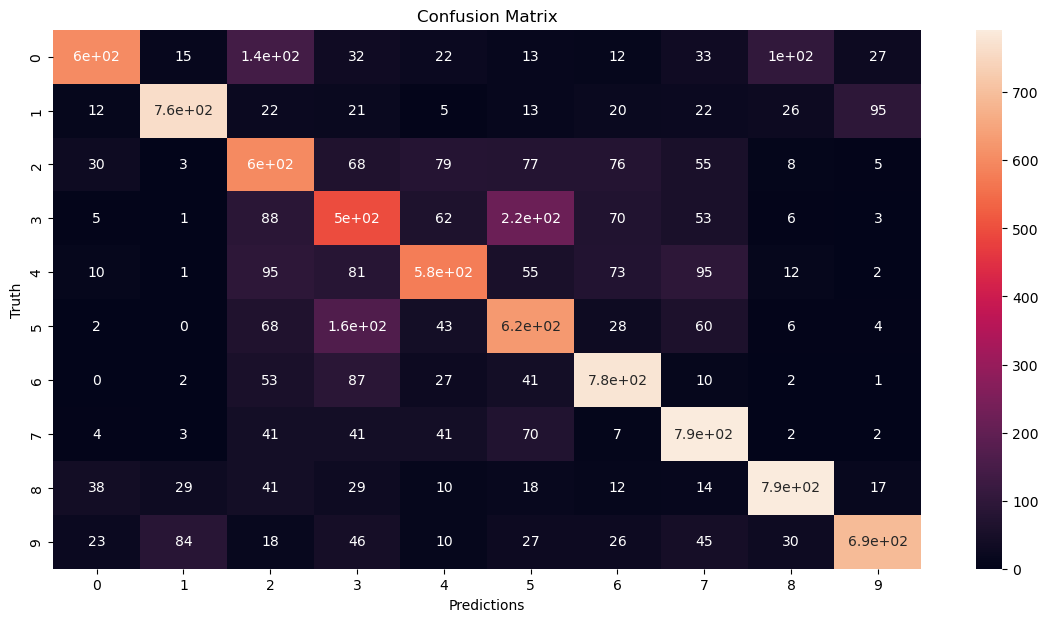

In [30]:
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()